# Solving problems with Stochastic Gradient Descent (SGD)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## Least squares

Building a simple function in python

In [2]:
def square(array_in):
    return np.power(array_in, 2)

And applying it to some data and a two parameter model

In [3]:
N_POINTS= 100
x = np.random.normal(0.0, 1.0, 100)
y = 2.5 * x + 2.5 + np.random.normal(0.0, 0.1, 100)

def loss(a, b):
    y_pred = a * x + b
    return np.sum(square(y - y_pred))

Gives us a score representing how well the model is doing

In [4]:
loss(0.01, 0.4)

1207.9448887090462

And ideally we would like to decrease this score as much as possible

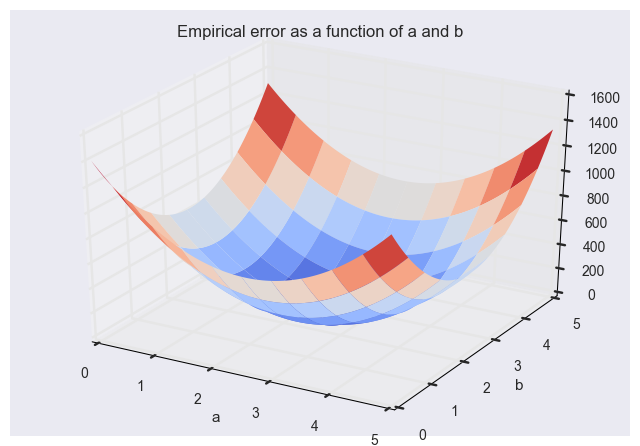

In [5]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

a_grid = np.arange(0.0, 5.0, 0.05)
b_grid = np.arange(0.0, 5.0, 0.05)
error_plot = np.asanyarray([[loss(a, b) 
                             for b in b_grid]
                            for a in a_grid])
A, B = np.meshgrid(a_grid, b_grid)

fig = plt.figure()
ax = fig.gca(projection='3d')

im = ax.plot_surface(A, B, error_plot, cmap=cm.coolwarm, linewidth=0)

plt.title('Empirical error as a function of a and b')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

At any point in this 2D space, we can compute the sensitivity of the error with respect to the parameters a and b. This is called the gradient and is defined as the vector (dloss / da, dloss / db).

Write down the analytical expression for loss(a,b) and derive the corresponding gradient:

### YOUR ANSWER HERE
Write a function to compute the gradient as a pair of outpus

In [6]:
def loss_grad(a, b):
    #
    #  Your code here
    #

    #return (something, something)
    
    #
    #  Answer
    #
    return (-2.0 * np.sum((y - (a * x + b)) * x), -2.0 * np.sum((y - (a * x + b))))

## Gradient Descent

The minizing (a, b) pair is the lowest point we can find on the 3d surface above. The most direct way of getting to the point is to follow a stepest descent approach.

The direction of steepest descent in a neighboring point of a continuously differentiable function is given by the gradient at then point.

We will follow the direction given by the gradient at our start point (a[0], b[0]), then recompute the gradient at the new point (a[1] = a[0] - epsilon * g_0, b[1] = b[0] - epsilon * g_1) where g_0 is the partial derivative of the loss function with respect to its first input and g_1 its partial derivative with respect to its second input.

Here, epsilon is our learning rate.

### YOUR ANSWER HERE
Update the old parameters a and b with a pre-computed gradient.

In [7]:
def new_params(a, b, learning_rate, gradient):
    #
    #   Your code here
    #

    #return (something, something)
    
    #
    #   Answer
    #
    return (a - learning_rate * gradient[0], b - learning_rate * gradient[1])

### YOUR ANSWER HERE

Code the gradient descent algorithm starting a parameter value (a_init, b_init).

The stopping criterion is sqaured_l2_norm(gradient) < precision * (1 + abs(loss)).

In [8]:
def gradient_descent(a_init, b_init, learning_rate, loss_eval_fct, gradient_eval_fct, 
                     precision=1e-3, MAX_STEPS=10000):
    #
    #    Your code here
    #
    
    #return (a_opt, b_opt, n_steps, trajectory, losses)
    
    #
    #    Answer
    #
    old_loss = loss_eval_fct(a_init, b_init)
    converged = False
    a = a_init
    b = b_init
    
    n_steps = 0
    trajectory = [(a_init, b_init)]
    losses = []
    
    while not converged:
        n_steps += 1
        
        gradient = gradient_eval_fct(a, b)
        
        a -= learning_rate * gradient[0]
        b -= learning_rate * gradient[1]
        
        new_loss = loss_eval_fct(a, b)
        converged = np.sum(np.array(gradient)**2) < precision * (1 + np.abs(new_loss))
        
        old_loss = new_loss
        
        trajectory.append((a, b))
        losses.append(old_loss)
        
        if n_steps > MAX_STEPS:
            print 'Warning: gradient descent did not converge'
            break
        
    return a, b, n_steps, trajectory, losses

### YOUR ANSWER HERE

Apply the gradient descent algorithm to our initial least squares problem.

Optimum found (2.504, 2.508) in 43 steps of Gradient Descent.


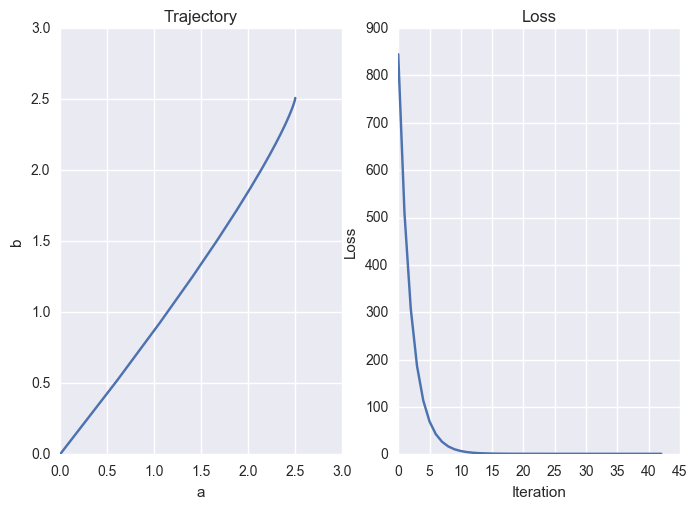

In [9]:
a_opt, b_opt, n_steps, trajectory, losses = gradient_descent(0.0, 0.0, 1e-3, loss, loss_grad)

print 'Optimum found (%.3f, %.3f) in %d steps of Gradient Descent.' % (a_opt, b_opt, n_steps)

plt.subplot(121)
plt.plot([param[0] for param in trajectory], [param[1] for param in trajectory])
plt.title('Trajectory')
plt.xlabel('a')
plt.ylabel('b')

plt.subplot(122)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

a) What is the sensitivity of the run time with respect to your choice of initial values?

b) What is the sensitivity of the run time with respect to the precision?

c) What is the sensitivity of the run time with respect to the learning rate? 

d) What happens if the learning rate is very high? What happens if it's very low?

### YOUR ANSWERS HERE:

a)

b)

c)

d)

#### Answers:

a) Proportional to the log of the distance between initial values and optimum.

b) Proportional to the log of the precision.

c) It depends unfortunately...

d) If the learning rate is too high the algorithm diverges, it it's too low it takes more time to converge.